<p align="center">
  <img src="chart_zoom.jpg" alt="chart_zoom">
</p>

Fraud doesn’t just cost money—it costs trust. As a key member of a financial compliance team, your mission is to uncover suspicious transactions that might otherwise slip through the cracks. With the stakes this high, your insights could be the difference between stopping fraud in its tracks or letting it go unnoticed.

In this project, you'll harness the power of IForest from pyod.models to detect anomalies in banking data. Your challenge: flag unusual transactions, summarize your findings, and deliver actionable insights that ensure trust, security, and efficiency in financial operations.

## Hints and Notes

- Ensure there are no missing values in the output DataFrame.
- Be sure to label the axes and legend clearly on the histogram to make the anomalies easily identifiable.

## The Data

You will work with a dataset containing information about financial transactions. Below is a summary of the key columns provided:

| **Column**              | **Description**                                                                                   |
|--------------------------|---------------------------------------------------------------------------------------------------|
| `TransactionID`          | A unique identifier for each transaction.                                                       |
| `TransactionAmount`      | The amount of money involved in the transaction (in USD).                                        |
| `TransactionDuration`    | Duration of the transaction (in seconds).                                                       |
| `AccountBalance`         | The balance of the account after the transaction was processed (in USD).                        |



In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

transactions = pd.read_csv("transactions.csv")

# Isolate key columns
columns_to_display = ["TransactionID", "TransactionAmount", "TransactionDuration", "AccountBalance"]
transactions = transactions[columns_to_display]

# Display the first rows of the table
transactions.head()

,TransactionID,TransactionAmount,TransactionDuration,AccountBalance
0,TX000001,14.09,81,5112.21
1,TX000002,376.24,141,13758.91
2,TX000003,126.29,56,1122.35
3,TX000004,184.50,25,8569.06
4,TX000005,13.45,198,7429.40


In [5]:
# Select numerical features for anomaly detection
features = transactions[["TransactionAmount", "TransactionDuration", "AccountBalance"]]

# Train an IForest model with n_estimators parameter
model = IForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(features)

# Add the anomaly scores to the dataset
transactions["Anomaly_Score"] = model.decision_function(features)

# Flag transactions as anomalies based on the model's prediction
transactions["Anomaly"] = (model.predict(features) == 1).astype(int)  # Convert boolean to integer

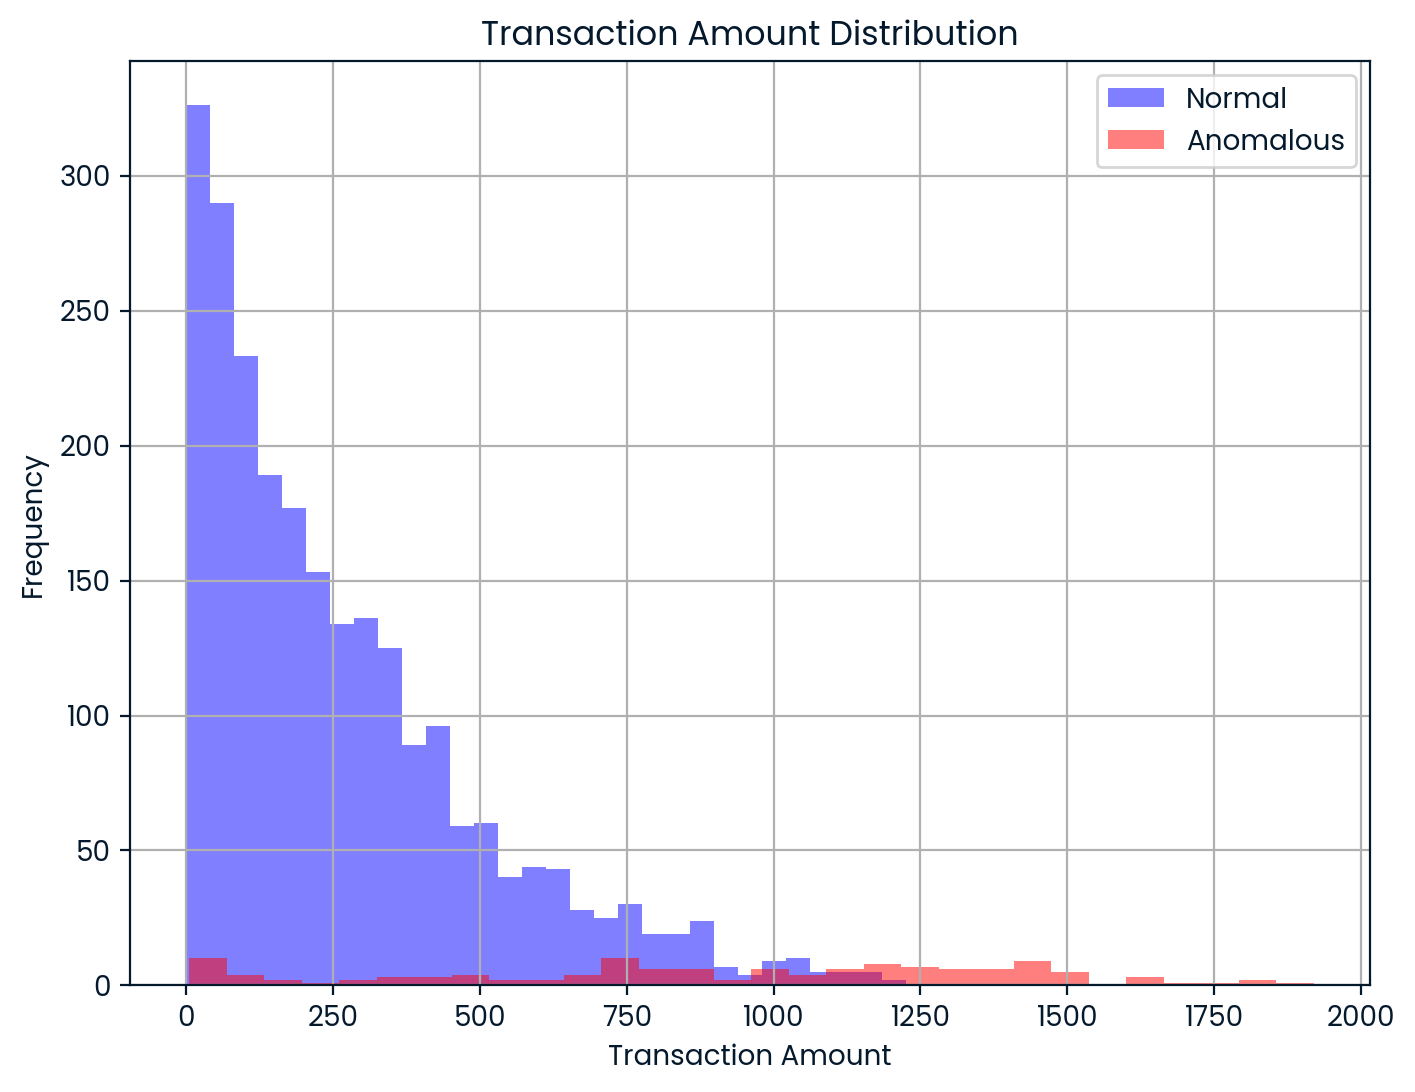

In [6]:
# Create a summary of anomalous transactions
anomalies_summary = transactions.loc[transactions["Anomaly"] == 1, ["TransactionID", "TransactionAmount", "TransactionDuration", "AccountBalance"]]

# Plot the distribution of TransactionAmount for normal and anomalous transactions
plt.figure(figsize=(8, 6))
transactions[transactions["Anomaly"] == False]["TransactionAmount"].hist(bins=30, alpha=0.5, label="Normal", color="blue")
transactions[transactions["Anomaly"] == True]["TransactionAmount"].hist(bins=30, alpha=0.5, label="Anomalous", color="red")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("anomalies_histogram.png")